## PLS Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Load the Diabetes dataset
diabetes = datasets.load_diabetes()

In [3]:
# Extract features (X) and target variable (y)
X = diabetes.data
y = diabetes.target

In [4]:
diabetes.data.shape

(442, 10)

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Initialize PLS model with the desired number of components
n_components = 3
pls_model = PLSRegression(n_components=n_components)

In [7]:
# Fit the model on the training data
pls_model.fit(X_train, y_train)

PLSRegression(n_components=3)

In [8]:
# Predictions on the test set
y_pred = pls_model.predict(X_test)

In [9]:
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2860.188967440198


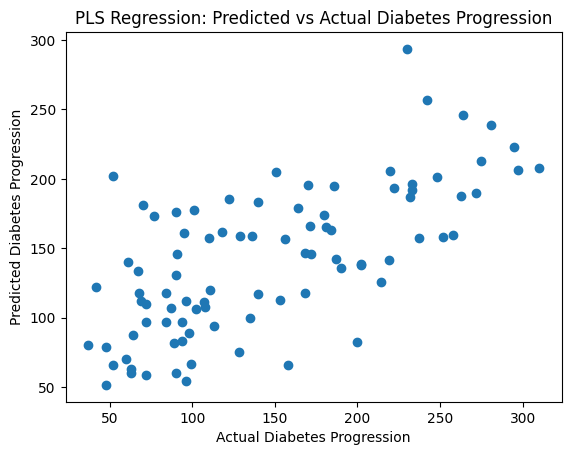

In [10]:
# Visualize predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Diabetes Progression")
plt.ylabel("Predicted Diabetes Progression")
plt.title("PLS Regression: Predicted vs Actual Diabetes Progression")
plt.show()

PLS MSE = 2860.188967440198
PCR MSE = 2962.319516036815
LR MSE = 2900.193628493482


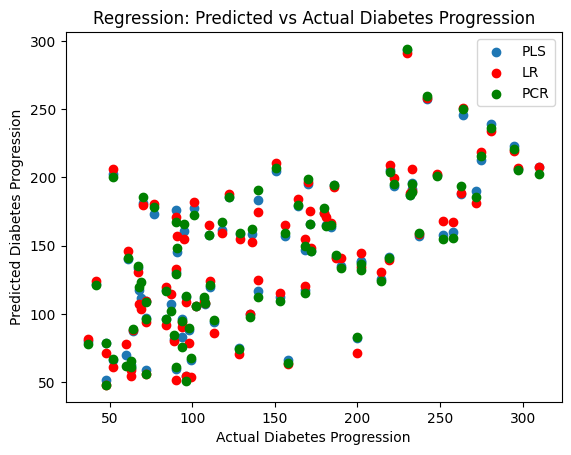

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

print("PLS MSE =", mse)
pca = PCA(n_components=6)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
pcr_model = LinearRegression()
pcr_model.fit(X_train_pca, y_train)
y_pred_pcr = pcr_model.predict(X_test_pca)
mse_pcr = mean_squared_error(y_test, y_pred_pcr)
print("PCR MSE =", mse_pcr)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("LR MSE =", mse_lr)

# Visualize predicted vs actual values
plt.scatter(y_test, y_pred)
plt.scatter(y_test, y_pred_lr, color='red', alpha=1)
plt.scatter(y_test, y_pred_pcr, color='green', alpha=1)
plt.xlabel("Actual Diabetes Progression")
plt.ylabel("Predicted Diabetes Progression")
plt.title("Regression: Predicted vs Actual Diabetes Progression")
plt.legend(["PLS", "LR", "PCR"])
plt.show()

Using 353 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/89 [00:00<?, ?it/s]

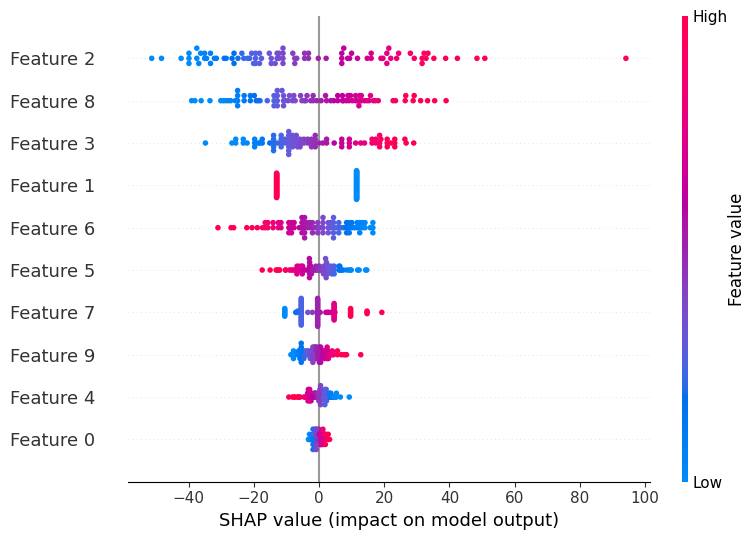

In [12]:
#!pip install shap

import shap

# Assuming 'pls_model' is your trained PLS regression model
# Assuming 'X_train' is your training set features
# Assuming 'X_test' is your test set features

# Create a SHAP explainer for the PLS regression model using KernelExplainer
explainer = shap.KernelExplainer(pls_model.predict, X_train)

# Calculate SHAP values for the entire test set
shap_values = explainer.shap_values(X_test)

# Summary plot for all instances
shap.summary_plot(shap_values, X_test)



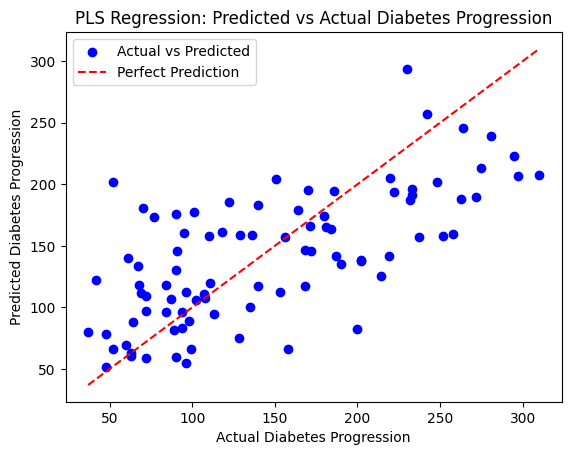

In [13]:
# Visualize predicted vs actual values with different colors
plt.scatter(y_test, y_pred, c='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', c='red', label='Perfect Prediction')
plt.xlabel("Actual Diabetes Progression")
plt.ylabel("Predicted Diabetes Progression")
plt.title("PLS Regression: Predicted vs Actual Diabetes Progression")
plt.legend()
plt.show()


In [27]:
# Install scikit-learn if not already installed
# !pip install scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

n_comp = 3

# Load the Wine Quality dataset
wine_data = pd.read_csv("winequality-red.csv", delimiter=';')

# Separate independent variables (X) and dependent variable (y)
X = wine_data.drop("quality", axis=1)
y = wine_data["quality"]

# Data scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize PLS model with the desired number of components
pls_model = PLSRegression(n_components=n_comp)

# Fit the model on the training data
pls_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = pls_model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f"PLS -- Mean Squared Error: {mse}")

lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"LR -- Mean Squared Error: {mse_lr}")

pca = PCA(n_components=n_comp)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
pcr_model.fit(X_train_pca, y_train)
y_pred_pcr = pcr_model.predict(X_test_pca)
mse_pcr = mean_squared_error(y_test, y_pred_pcr)
print(f"PCR -- Mean Squared Error: {mse_pcr}")



PLS -- Mean Squared Error: 0.38981271486351965
LR -- Mean Squared Error: 0.390025143963955
PCR -- Mean Squared Error: 0.41540531688327886


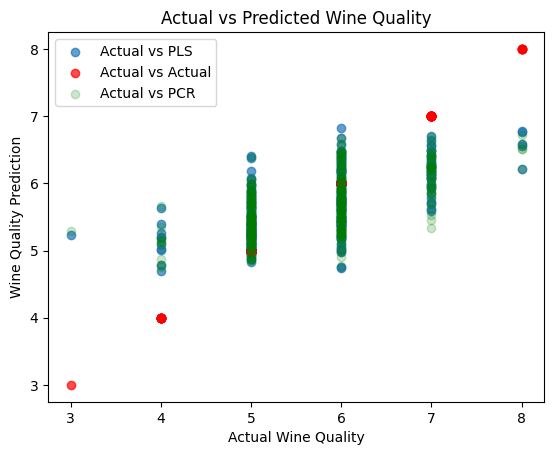

In [31]:
plt.scatter(y_test, y_pred, label='Actual vs PLS', alpha=0.7)
plt.scatter(y_test, y_test, label='Actual vs Actual', alpha=0.7, color='red')  # Different color for actual values
plt.scatter(y_test, y_pred_pcr, label='Actual vs PCR', color='green', alpha=0.2)
plt.xlabel("Actual Wine Quality")
plt.ylabel("Wine Quality Prediction")
plt.title("Actual vs Predicted Wine Quality")
plt.legend()
plt.show()

Mean Squared Error: 2860.188967440198


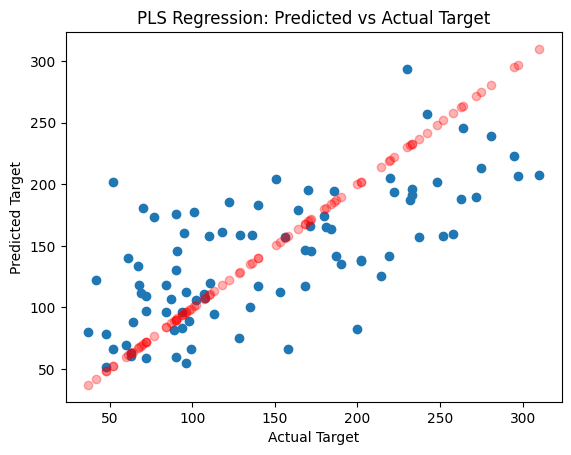

In [16]:
# Install scikit-learn if not already installed
# pip install scikit-learn

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error

# Load the Diabetes dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

# Data scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize PLS model with the desired number of components
pls_model = PLSRegression(n_components=3)

# Fit the model on the training data
pls_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = pls_model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualize predicted vs actual values
plt.scatter(y_test, y_pred)
plt.scatter(y_test, y_test, color='red', alpha=0.3)
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.title("PLS Regression: Predicted vs Actual Target")
plt.show()


PCR vs PLS https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html